# Computer Lab 2 – Model fitting and classification

## Exercise 1 – Model fitting for continuous distributions: multivariate Gaussian
 
In this exercise, you will employ a real dataset (file `heightWeigth.mat`), containing labelled data for two classes, i.e. males and females. Every row of the dataset contains three numbers: the gender (1=male, 2=female), the height (cm) and the weight (kg) of each person in the dataset.

Task: you have to fit class-conditional Gaussian multivariate distributions to these data, and visualize the probability density functions. In particular, you should perform the following: 
 
* Divide the dataset in two parts (males and females). Then work only on one gender at a time. 
* Plot the data of each class (use the scatter( ) function) 
* Visualize the histogram of weight and height (use e.g. the hist( ) function) 
* Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data? 
* Visualize the 2-D joint pdf of weight and height. Note: inside a Matlab figure, you can use the “Rotate 3D button” to change the viewpoint.

## Multivariate Gaussian: Theory

Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
### Multivariate Gaussian Model
One can typically use MVN (_multivariate normal_) for continuous data, particularly for joint probabilities. This model can handle high-dimensional data.
The probability distribution function is given by $$\mathcal{N}(\vec{x}|\vec{\mu},\Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}\exp{\Big(-\frac12(\vec{x}-\vec{\mu})^T\Sigma^{-1}(\vec{x}-\vec{\mu})\Big)}$$
with:
* $\vec{x}$: the data vector
* $\vec{\mu}$: the mean vector
* $(\vec{x}-\vec{\mu})^T\Sigma^{-1}(\vec{x}-\vec{\mu})$: the Mahalanobis distance
* $\Sigma=U\Lambda U^T$: eigendecomposition, with $\Lambda$ eigenvalues matrix (diagonal) and $UU^T=\mathbb{I}$ eigenvector matrix (diagonal)

Then it is possible to show that $$\Sigma^{-1}=U^{-T}\Lambda^{-1}U^{-1}=U\Lambda^{-1}U^T=\sum_{\alpha=1}^{D}\frac{\vec{u}_{\alpha}\vec{u}_{\alpha}^T}{\lambda_{\alpha}}$$ so the M-distance can be rewritten as $$(\vec{x}-\vec{\mu})^T\Sigma^{-1}(\vec{x}-\vec{\mu})=\sum_{\alpha=1}^D(\vec{x}-\vec{\mu})^T\frac{\vec{u}_{\alpha}\vec{u}_{\alpha}^T}{\lambda_{\alpha}}(\vec{x}-\vec{\mu})=\sum_{\alpha=1}^D\frac{y_{\alpha}^2}{\lambda_{\alpha}}$$ with $y_{\alpha}=\vec{u}_{\alpha}^T(\vec{x}-\vec{\mu})$.

We have then the ellipse equation in the 2-dimensional case ($\alpha=1,2$) $$\frac{y_1^2}{\lambda_2}+\frac{y_2^2}{\lambda_2}=r$$ and if the M-distance is simply the Euclidean distance $\Sigma=\sigma^2\mathbb{I}$.

### Estimating MVN parameters through the MLE
If $\vec{x}_i\sim\mathcal{N}(\vec{\mu},\Sigma)$ then the Gaussian MLE says:
1. $\vec{\mu}_{MLE}=\frac1N\sum_{i=1}^{N}\vec{x}_i$ (the empirical mean from data)
2. $\Sigma_{MLE}=\frac1N\sum_{i=1}^N(\vec{x}_i-\vec{\mu}_{MLE})(\vec{x}_i-\vec{\mu}_{MLE})^T=\frac1N(\sum_{i=1}^N\vec{x}_i\vec{x}_i^T)-\vec{\mu}_{MLE}\vec{\mu}_{MLE}^T$

# 0. Load Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
import sys
from tqdm import tqdm

# Plots
sns.set_context(
    'talk', rc = {
        'font.size': 12.0,
        'axes.labelsize': 10.0,
        'axes.titlesize': 10.0,
        'xtick.labelsize': 10.0,
        'ytick.labelsize': 10.0,
        'legend.fontsize': 10.0,
        'legend.title_fontsize': 12.0,
        'patch.linewidth': 2.0
        }
    ) # 'paper'

sys.path += ['../../']

from config import DATA_PATH

In [2]:
FILE_NAME = "heightWeight.mat"

try:
    data = scipy.io.loadmat(DATA_PATH + FILE_NAME)
    print(f"Data ✓")
    print(f"Data keys: {data.keys()}")
except:
    print(f"Data not found! ({DATA_PATH}, {FILE_NAME})")

Data ✓
Data keys: dict_keys(['__header__', '__version__', '__globals__', 'heightWeightData'])


In [67]:
data_df = pd.DataFrame(
    data['heightWeightData'],
    columns=['gender', 'height', 'weight']
    )

# Lenght of male/female data
print(f"N={len(data_df)} (number of data points)")
print(f"Male(%)={round(len(data_df[data_df.gender == 1]) / len(data_df), 2)}")
print(f"Female(%)={round(len(data_df[data_df.gender == 2]) / len(data_df), 2)}")

N=210 (number of data points)
Male(%)=0.35
Female(%)=0.65


In [68]:
# Check for duplicated
len(data_df[data_df.duplicated()]), len(data_df[data_df[['weight', 'height']].duplicated()])

# Drop duplicated
data_df = data_df.drop_duplicates(keep='first')

# Lenght of male/female data
print(f"N={len(data_df)} (number of data points, dropped duplicated)")
print(f"Male(%)={round(len(data_df[data_df.gender == 1]) / len(data_df), 2)}")
print(f"Female(%)={round(len(data_df[data_df.gender == 2]) / len(data_df), 2)}")

N=178 (number of data points, dropped duplicated)
Male(%)=0.35
Female(%)=0.65


# 1. Scatter Plot for each class (male/female)

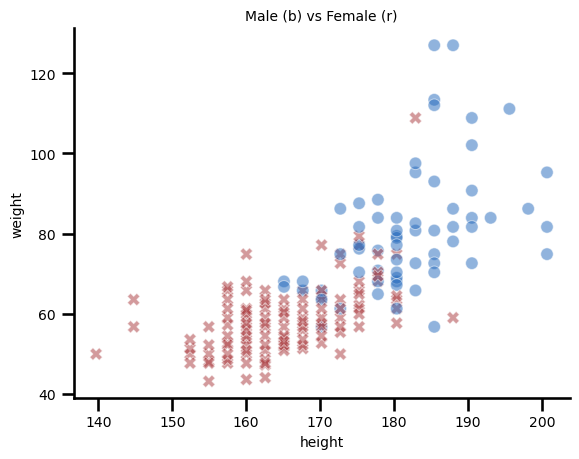

In [69]:
fig1 = sns.scatterplot(
    data=data_df, x='height', y='weight',
    hue='gender', style='gender',
    palette='vlag', alpha=0.5, legend=False
    )

fig1.set_title(r"Male (b) vs Female (r)")
sns.despine(right=True)
plt.show()

# 2. Weight-height Histograms

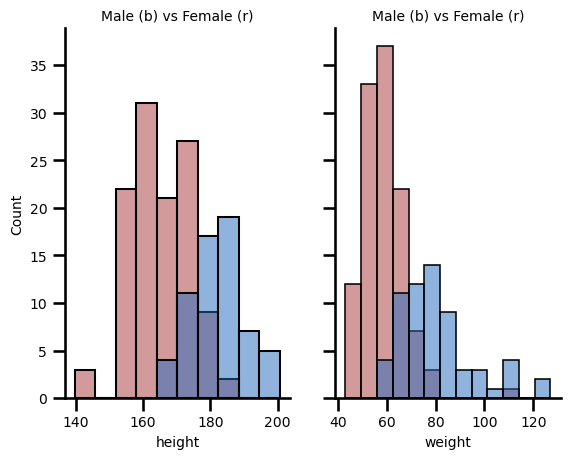

In [79]:
fig2 = plt.figure()
ax = fig2.subplot_mosaic('''
AB
''', sharey=True)

p_order = {
    'height': 'A',
    'weight': 'B'
    }

for feature in ['height', 'weight']:
    sns.histplot(
        data=data_df, x=feature, ax=ax[p_order[feature]],
        hue='gender',
        palette='vlag', alpha=0.5, legend=False
        )
    ax[p_order[feature]].set_title(r"Male (b) vs Female (r)")

sns.despine(right=True)
plt.show()

In [30]:
# Maximum likelihood estimation for MVN
data_df[['weight', 'height']].mean(axis=0)

weight     66.070080
height    171.099238
dtype: float64

In [83]:
data_df[['weight', 'height']].cov()

,weight,height
weight,245.158133,131.345221
height,131.345221,137.334549
